In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
base_db = pd.read_csv('Startups in 2021 end.csv')

In [3]:
base_db.shape

(936, 8)

In [4]:
base_db.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [5]:
base_db.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [6]:
# Renomeando as colunas
base_db.rename (columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'País',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Select Investors' : 'Investidores',
}, inplace=True)

In [7]:
base_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [8]:
# Verificando os campos nulos e contando a quantidade deles
base_db.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
País               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

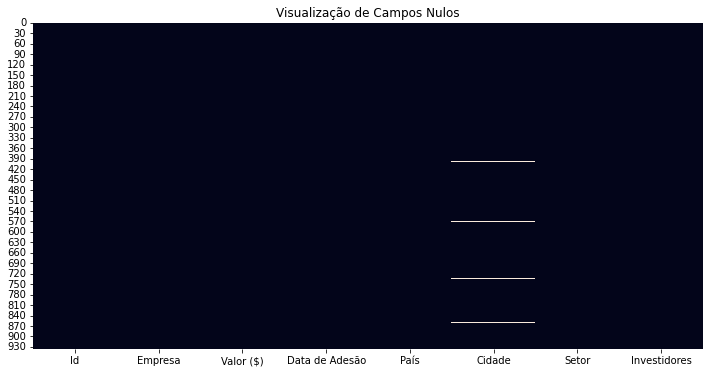

In [9]:
plt.figure(figsize=(12,6))
plt.title('Visualização de Campos Nulos')
sns.heatmap(base_db.isnull(), cbar=False);

In [10]:
# Campos únicos
base_db.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
País               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [11]:
# Setores únicos
base_db['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [12]:
# Rank por setor
base_db['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [13]:
# Rank por setor (%)
round(base_db['Setor'].value_counts(normalize=True) * 100, 2)

Fintech                                20.30
Internet software & services           17.84
E-commerce & direct-to-consumer        10.90
Artificial intelligence                 7.37
Health                                  6.73
Supply chain, logistics, & delivery     5.45
Other                                   5.45
Cybersecurity                           4.38
Mobile & telecommunications             3.95
Data management & analytics             3.85
Hardware                                3.42
Auto & transportation                   3.10
Edtech                                  2.88
Consumer & retail                       2.46
Travel                                  1.39
Artificial Intelligence                 0.43
Finttech                                0.11
Name: Setor, dtype: float64

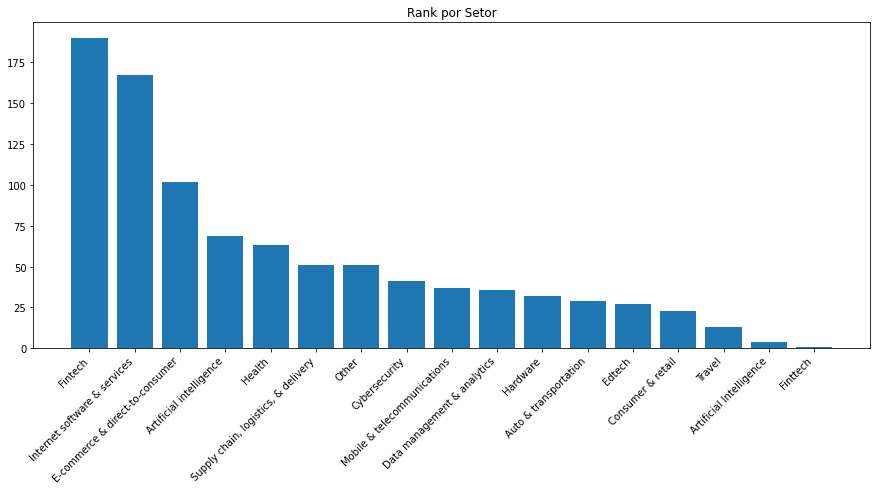

In [14]:
plt.figure(figsize=(15,6))
plt.title('Rank por Setor')
plt.bar(base_db['Setor'].value_counts().index, base_db['Setor'].value_counts())
plt.xticks(rotation=45, ha='right');

In [15]:
# Startups por país
base_db['País'].value_counts()

United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia                  1
Czech Republic            1
United States,      

In [16]:
# Startup por país (%)
startups_relativo = round(base_db['País'].value_counts(normalize=True) * 100, 2)
startups_relativo

United States           50.96
China                   18.06
India                    5.45
United Kingdom           3.95
Germany                  2.46
Israel                   2.24
France                   2.03
Canada                   1.60
Brazil                   1.60
South Korea              1.18
Singapore                1.18
Hong Kong                0.75
Japan                    0.64
Australia                0.64
Mexico                   0.53
Netherlands              0.53
Indonesia                0.43
Spain                    0.43
Sweden                   0.43
Switzerland              0.43
Ireland                  0.32
United Arab Emirates     0.32
Norway                   0.32
Belgium                  0.21
Thailand                 0.21
Denmark                  0.21
Philippines              0.21
Finland                  0.21
Colombia                 0.21
South Africa             0.21
Turkey                   0.21
Austria                  0.21
Chile                    0.11
Malaysia  

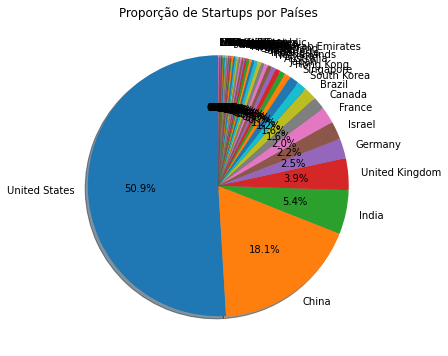

In [17]:
plt.figure(figsize=(15,6))
plt.title('Proporção de Startups por Países')
plt.pie(
    startups_relativo,
    labels = startups_relativo.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%',
);

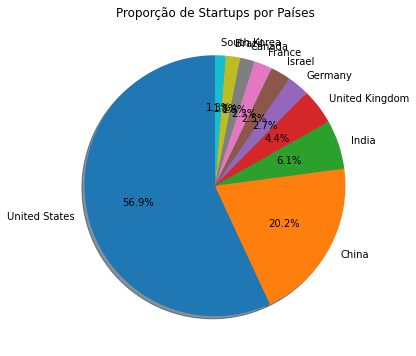

In [18]:
# Top 10 Países com mais empresas unicórnios em 2021
plt.figure(figsize=(15,6))
plt.title('Proporção de Startups por Países')
plt.pie(
    startups_relativo.head(10),
    labels = startups_relativo.index[:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%',
);

In [19]:
base_db['Data de Adesão'] = pd.to_datetime(base_db['Data de Adesão'])
base_db['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [20]:
base_db['Mês'] = pd.DatetimeIndex(base_db['Data de Adesão']).month
base_db['Ano'] = pd.DatetimeIndex(base_db['Data de Adesão']).year
base_db.head()

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [21]:
# Tabela analítica com agrupamento
analise_agrupada = base_db.groupby(by=['País', 'Ano', 'Empresa']).count()['Id'].reset_index()
analise_agrupada

,País,Ano,Empresa,Id
0,Argentina,2021,Uala,1
1,Australia,2018,Canva,1
2,Australia,2019,Airwallex,1
3,Australia,2021,Culture Amp,1
4,Australia,2021,GO1,1
...,...,...,...,...
931,United States,2021,candy.com,1
932,United States,2021,dbt Labs,1
933,United States,2021,iCapital Network,1
934,"United States,",2021,TrialSpark,1


In [22]:
# Informações do Brasil
analise_agrupada.loc[
    analise_agrupada['País'] == 'Brazil'
]

,País,Ano,Empresa,Id
12,Brazil,2018,Movile,1
13,Brazil,2018,Nubank,1
14,Brazil,2018,iFood,1
15,Brazil,2019,EBANX,1
16,Brazil,2019,Loggi,1
17,Brazil,2019,QuintoAndar,1
18,Brazil,2019,Wildlife Studios,1
19,Brazil,2020,C6 Bank,1
20,Brazil,2020,Creditas,1
21,Brazil,2020,Loft,1


In [24]:
# Tratando a coluna 'Valor ($)' para o formato numérico.
base_db['Valor ($)'] = pd.to_numeric(base_db['Valor ($)'].apply( lambda Linha: Linha.replace('$', '')))
base_db.head()

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [31]:
# Valor total das Startups por país - Top 10
valor_pais = base_db.groupby(by=['País']).sum()['Valor ($)'].reset_index()
valor_pais.sort_values('Valor ($)', ascending=False).head(10)

,País,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


Brasil é o nono colocado em número de criação de Startups, mas é o sexto em nível de valor de mercado.